# Multiplicative SHAP Testing

## Get the Data

In [2]:
import xgboost as xgb

In [3]:
dat = xgb.DMatrix('iris.csv?format=csv&label_column=')

In [ ]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}

In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np
from alibi.explainers import KernelShap
from siuba import _, filter, mutate, select, arrange, group_by
import shap
import matplotlib.pyplot as plt
iris = pd.read_csv("iris.csv")

dat = xgb.DMatrix('iris.csv?format=csv&label_column=4')

X_train = iris >> select(-_.Species)

param = {'max_depth': 2, 'eta': 1, 'objective': 'multi:softprob', "num_class":3, "eval_metric":"logloss"}

bst = xgb.train(param, dat)

preds = bst.predict(dat)

x_train_array = pd.DataFrame.to_numpy(X_train)

explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(x_train_array)

np.shape(shap_values)

(3, 150, 4)

In [7]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_train.iloc[0,:], link="logit")


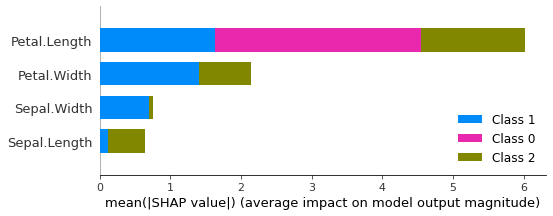

In [19]:
shap.summary_plot(shap_values, X_train)

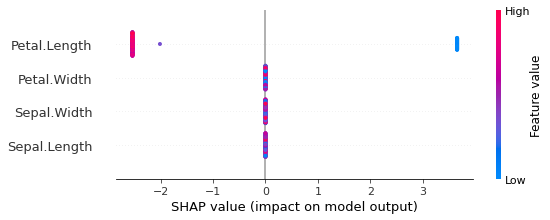

In [20]:
shap.summary_plot(shap_values[0], X_train)

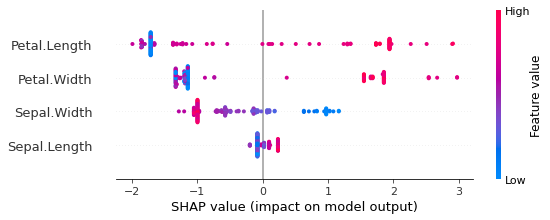

In [21]:
shap.summary_plot(shap_values[1], X_train)

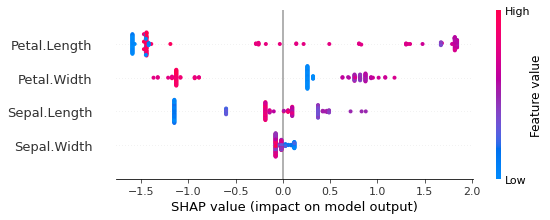

In [22]:
shap.summary_plot(shap_values[2], X_train)

In [13]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_train)

In [15]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)

In [23]:
shap.force_plot(explainer.expected_value[2], shap_values[2], X_train)

In [25]:
shap_int = shap.TreeExplainer(bst).shap_interaction_values(X_train)
np.shape(shap_int)

(3, 150, 4, 4)

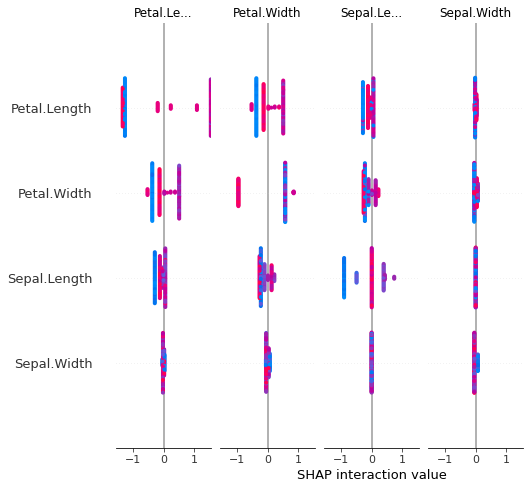

In [31]:
shap.summary_plot(shap_int[2], X_train.iloc[:,:])

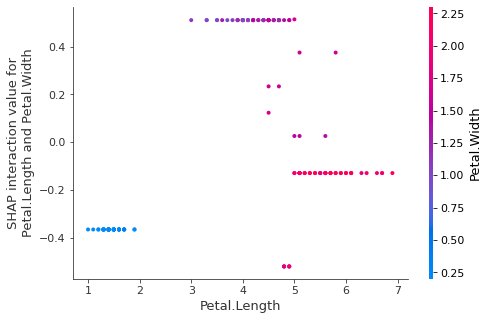

In [35]:
shap.dependence_plot(
    ("Petal.Length", "Petal.Width"),
    shap_int[2], X_train
)